In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep

In [2]:
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=2.5,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        self.m = m
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]
    def CheckColission(self,p2):
        F1=0
        d_v=(self.r-p2.r)
        d=(d_v[0]**2+d_v[1]**2)**0.5
        if d<self.radius+p2.radius:
            K=1
            n_v=(p2.r-self.r)/d
            F1=-0.15*K*n_v*d**3
            self.a=F1/self.m
        else:
            F1=0
            self.a=0

In [3]:
def RunSimulation1(t,Wall):
    
    r1 = np.array([-15.,1.])
    v1 = np.array([10.,0])
    a1 = np.array([0.,0.])
    
    r2 = np.array([0.,-1.5])
    v2 = np.array([0.,0.])
    a2 = np.array([0.,0.])
    
    
    p1 = Particle(r1,v1,a1,t)
    p2 = Particle(r2,v2,a2,t)
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        
        p1.Evolution(it)
        p2.Evolution(it)
        
        
        p1.CheckColission(p2)
        p2.CheckColission(p1)
        
        p1.CheckLimits(Wall_)
        p2.CheckLimits(Wall_)
    return p1,p2


In [4]:
# Region
Limits = np.array([[-20.,20.],[-20.,20.]])
Limits

array([[-20.,  20.],
       [-20.,  20.]])

In [5]:
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particle1, Particle2 = RunSimulation1(t,Limits)

Running simulation: 100%|████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 63.44 Steps/s]


In [6]:
scale = 1

In [7]:
t = t[::scale]

<IPython.core.display.Javascript object>


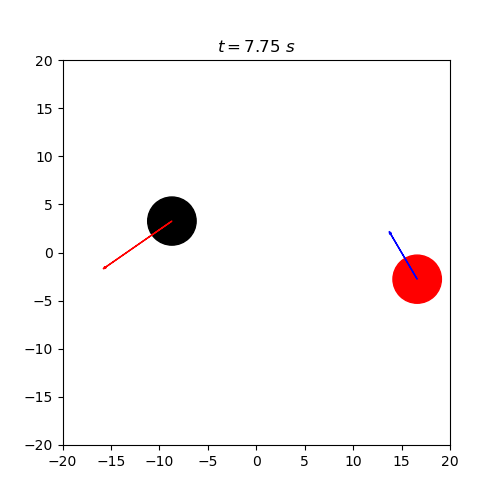

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    x1 = Particle1.GetPosition(scale)[i,0]
    y1 = Particle1.GetPosition(scale)[i,1]
    vx1 = Particle1.GetVelocity(scale)[i,0]
    vy1 = Particle1.GetVelocity(scale)[i,1]
    
    x2 = Particle2.GetPosition(scale)[i,0]
    y2 = Particle2.GetPosition(scale)[i,1]
    vx2 = Particle2.GetVelocity(scale)[i,0]
    vy2 = Particle2.GetVelocity(scale)[i,1]
    
    circle1 = plt.Circle((x1,y1),Particle1.radius, fill=True, color='k')
    ax.add_patch(circle1)
    
    circle2 = plt.Circle((x2,y2),Particle2.radius, fill=True, color='r')
    ax.add_patch(circle2)
    
    
    ax.arrow(x1,y1,vx1,vy1,color='r',head_width=0.2,length_includes_head=True)
    
    ax.arrow(x2,y2,vx2,vy2,color='Blue',head_width=0.2,length_includes_head=True)
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)